In [1]:
#load the libraary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_csv('Algerian_forest_fires_dataset_clean.csv')
data.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
data.rename(columns={'Unnamed: 0':'remove'},inplace=True)

In [35]:
data.drop('remove',axis=1,inplace=True)

In [36]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
## drop the column
df.drop(['day','month','year'],axis=1,inplace=True)

In [38]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [42]:
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [43]:
## categorcla to numrical value
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [44]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [49]:
# set independent and dependtent feature
X=df.drop('FWI',axis=1)
y=df['FWI']

In [80]:
## Trains test split
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [94]:
X_train.shape

(181, 11)

## feature selection

In [51]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647300,-0.274746,-0.345614,0.705055,0.492890,0.376148,0.628735,0.465267,0.545200,0.253777
RH,-0.647300,1.000000,0.231939,0.234878,-0.641884,-0.417732,-0.250138,-0.700552,-0.367746,-0.457546,-0.374339
Ws,-0.274746,0.231939,1.000000,0.182579,-0.120296,0.000381,0.100480,0.032940,0.037951,-0.030047,-0.249348
Rain,-0.345614,0.234878,0.182579,1.000000,-0.552525,-0.286043,-0.296688,-0.342808,-0.296684,-0.374895,-0.068452
FFMC,0.705055,-0.641884,-0.120296,-0.552525,1.000000,0.615820,0.533490,0.745063,0.605854,0.767070,0.209257
DMC,0.492890,-0.417732,0.000381,-0.286043,0.615820,1.000000,0.875484,0.692319,0.983266,0.621456,0.188130
DC,0.376148,-0.250138,0.100480,-0.296688,0.533490,0.875484,1.000000,0.552843,0.947023,0.555910,-0.091729
ISI,0.628735,-0.700552,0.032940,-0.342808,0.745063,0.692319,0.552843,1.000000,0.659996,0.757627,0.253274
BUI,0.465267,-0.367746,0.037951,-0.296684,0.605854,0.983266,0.947023,0.659996,1.000000,0.618737,0.086215
Classes,0.545200,-0.457546,-0.030047,-0.374895,0.767070,0.621456,0.555910,0.757627,0.618737,1.000000,0.160857


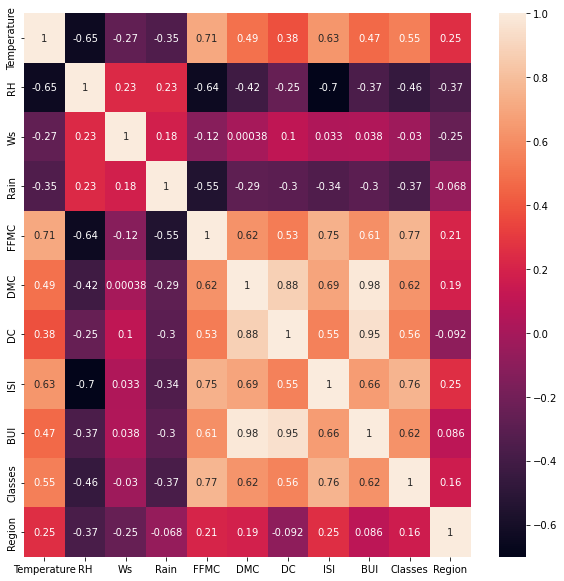

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()


In [55]:
## corelation
def corelation(dataset,threhsold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threhsold:
                colmnname=corr_matrix.columns[i]
                col_corr.add(colmnname)
    return col_corr
                   

In [102]:
## threshold on featue
corr_features=corelation(X_train,0.85)
corr_features

set()

In [101]:
corr_features

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
25,31,64,18,0.0,86.8,17.8,6.7,1,0
7,30,73,15,0.0,86.6,12.1,5.6,1,0
153,33,48,16,0.0,87.6,7.9,6.8,1,1
210,35,53,17,0.5,80.2,20.7,2.7,1,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [95]:
## drop the corelation feature
X_train_new=X_train.drop(corr_features,axis=1,inplace=True)
X_test_new=X_test.drop(corr_features,axis=1,inplace=True)

In [105]:
X_train.shape

(181, 9)

### Feature scalling or standardtization

In [61]:
from sklearn.preprocessing  import StandardScaler

In [65]:
sclaer=StandardScaler()

In [107]:
X_train_scaled=sclaer.fit_transform(X_train)
X_test_scaler=sclaer.fit_transform(X_test)

## box plot to understand effect of Standard scaller

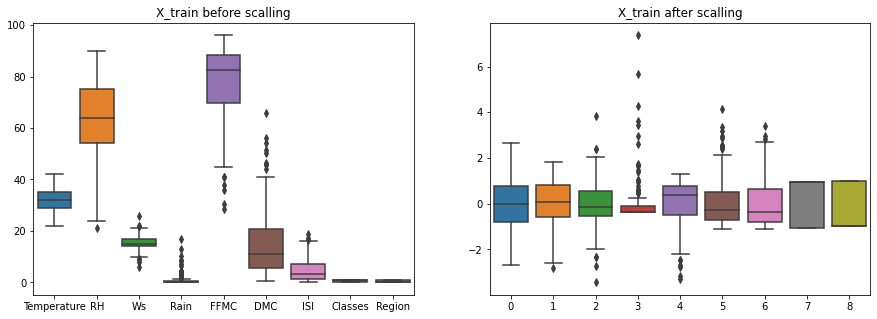

In [109]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scalling')
plt.show()

## Linear regression Model

In [110]:
## import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [112]:
liner=LinearRegression()
liner.fit(X_train_scaled,y_train)

LinearRegression()

In [113]:
y_pred=liner.predict(X_test_scaler)

In [114]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.8152534130914632
r2score 0.9766951118605068


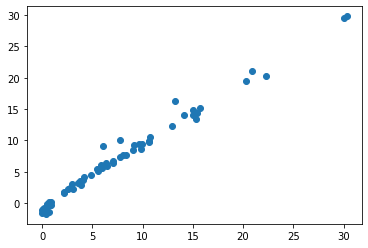

In [115]:
plt.scatter(y_test,y_pred)

### Lasso Regression

In [116]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [118]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

Lasso()

In [119]:
y_pred=lasso.predict(X_test_scaler)

In [120]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.9631800721191462
r2score 0.9594408329853048


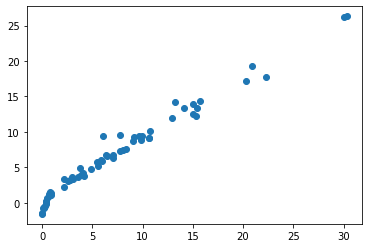

In [121]:
plt.scatter(y_test,y_pred)

## cross validation Lasso

In [122]:
from sklearn.linear_model  import LassoCV

In [129]:
lassocv=LassoCV(cv=5)

In [130]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [131]:
lassocv.alpha_

0.048952102297713844

In [ ]:
lassocv.alphas_

In [ ]:
lassocv.mse_path_

In [132]:
y_pred=lassocv.predict(X_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.8073519330585988
r2score 0.9764130117222716


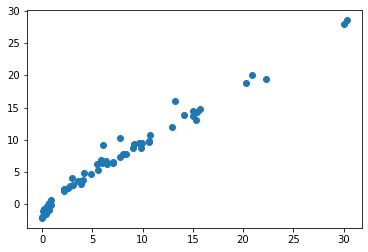

In [140]:
plt.scatter(y_test,y_pred)

### Ridge 

In [136]:
from sklearn.linear_model  import Ridge
Ridge=Ridge()

In [137]:
Ridge.fit(X_train_scaled,y_train)
y_pred=Ridge.predict(X_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.8226294320116583
r2score 0.9763171715261714


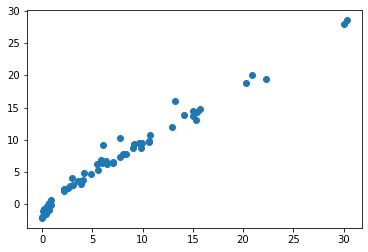

In [141]:
plt.scatter(y_test,y_pred)

## Ridge CV

In [134]:
from sklearn.linear_model  import RidgeCV

In [138]:
Ridgecv=RidgeCV(cv=5)

In [139]:
Ridgecv.fit(X_train_scaled,y_train)
y_pred=Ridgecv.predict(X_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.9367209842172519
r2score 0.970181902434167


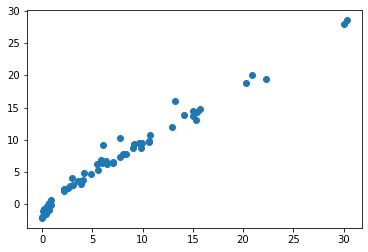

In [142]:
plt.scatter(y_test,y_pred)

In [145]:
Ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

### Elastic Net

In [143]:
from sklearn.linear_model  import ElasticNet
elastic=ElasticNet()

In [146]:
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 1.6500975150798451
r2score 0.8857326140207825


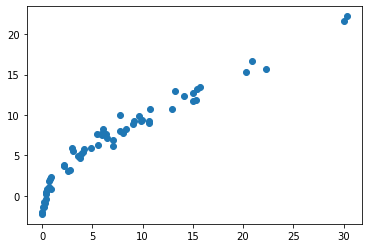

In [147]:
plt.scatter(y_test,y_pred)

### Elastic Net CV

In [149]:
from sklearn.linear_model  import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)

In [150]:
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('MAE',mae)
print('r2score',score)

MAE 0.8448893095966722
r2score 0.974811460634264


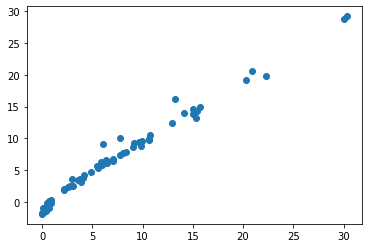

In [151]:
plt.scatter(y_test,y_pred)

### Pickle

## Pickle the machine learnig model , preprocessing  model standardscaler

In [153]:
import pickle

In [154]:
sclaer

StandardScaler()

In [156]:
Ridge

Ridge()

In [161]:
pickle.dump(sclaer,open('scaler.pkl','wb'))
pickle.dump(Ridge,open('Ridge.pkl','wb'))

In [ ]:
scaler=pickle.load(open('scaler.pkl','rb'))
model=pickle.load(open('Ridge.pkl','rb'))